In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV

In [317]:
UNSW_features = pd.read_csv("NUSW-NB15_features.csv",encoding='cp1252')
UNSW_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [319]:
df = pd.read_csv("UNSW_NB15_training-set.csv")
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [321]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [325]:
# Dimension of Dataset
print("dataset shape: ",df.shape)

dataset shape:  (82332, 45)


In [327]:
df.duplicated().sum()

0

In [329]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
id,0,0.0
dur,0,0.0
proto,0,0.0
service,0,0.0
state,0,0.0
spkts,0,0.0
dpkts,0,0.0
sbytes,0,0.0
dbytes,0,0.0
rate,0,0.0


In [331]:
df.dropna(inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [333]:
# Replacing '-' in service for 'other'
df['service'] = df['service'].replace('-','other')

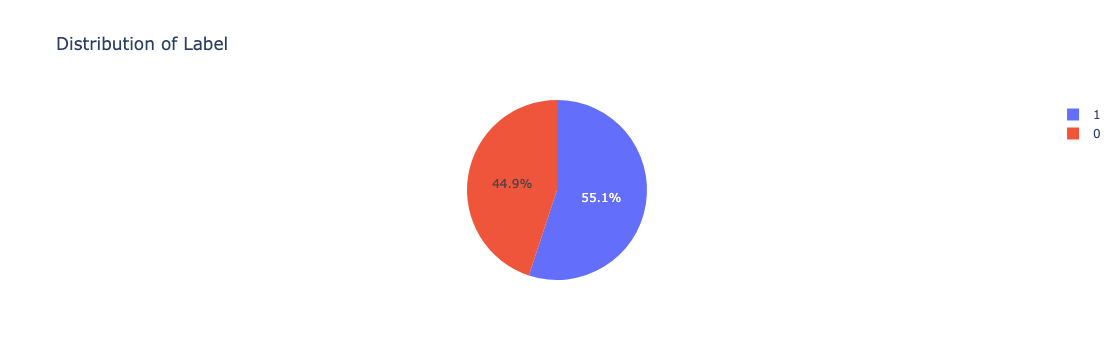

In [335]:
counts = df['label'].value_counts()
fig = px.pie(counts, values=counts.values, names=counts.index, title='Distribution of Label')
fig.show()

In [337]:
df[df['attack_cat']!='normal'].groupby('attack_cat').size()

attack_cat
Analysis            677
Backdoor            583
DoS                4089
Exploits          11132
Fuzzers            6062
Generic           18871
Normal            37000
Reconnaissance     3496
Shellcode           378
Worms                44
dtype: int64

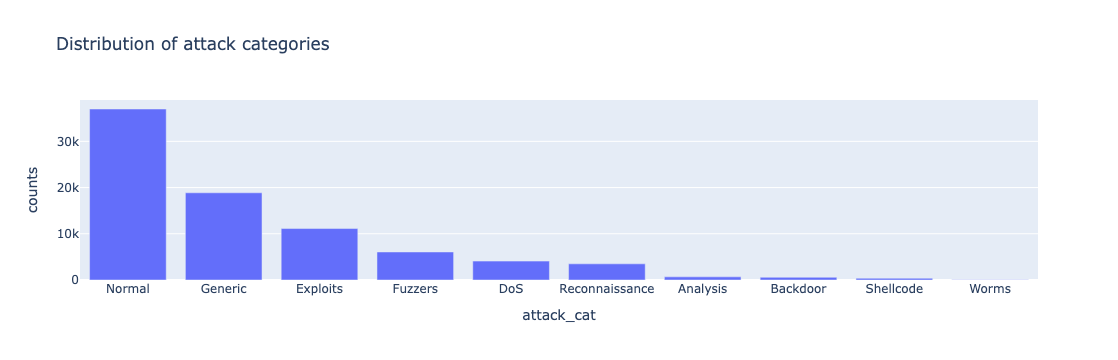

In [339]:
attack_by_cat = df[df['attack_cat']!='normal'].groupby('attack_cat').size().reset_index(name='counts').sort_values(by='counts', ascending = False)
fig = px.bar(attack_by_cat, x='attack_cat', y='counts', title='Distribution of attack categories')
fig.show()

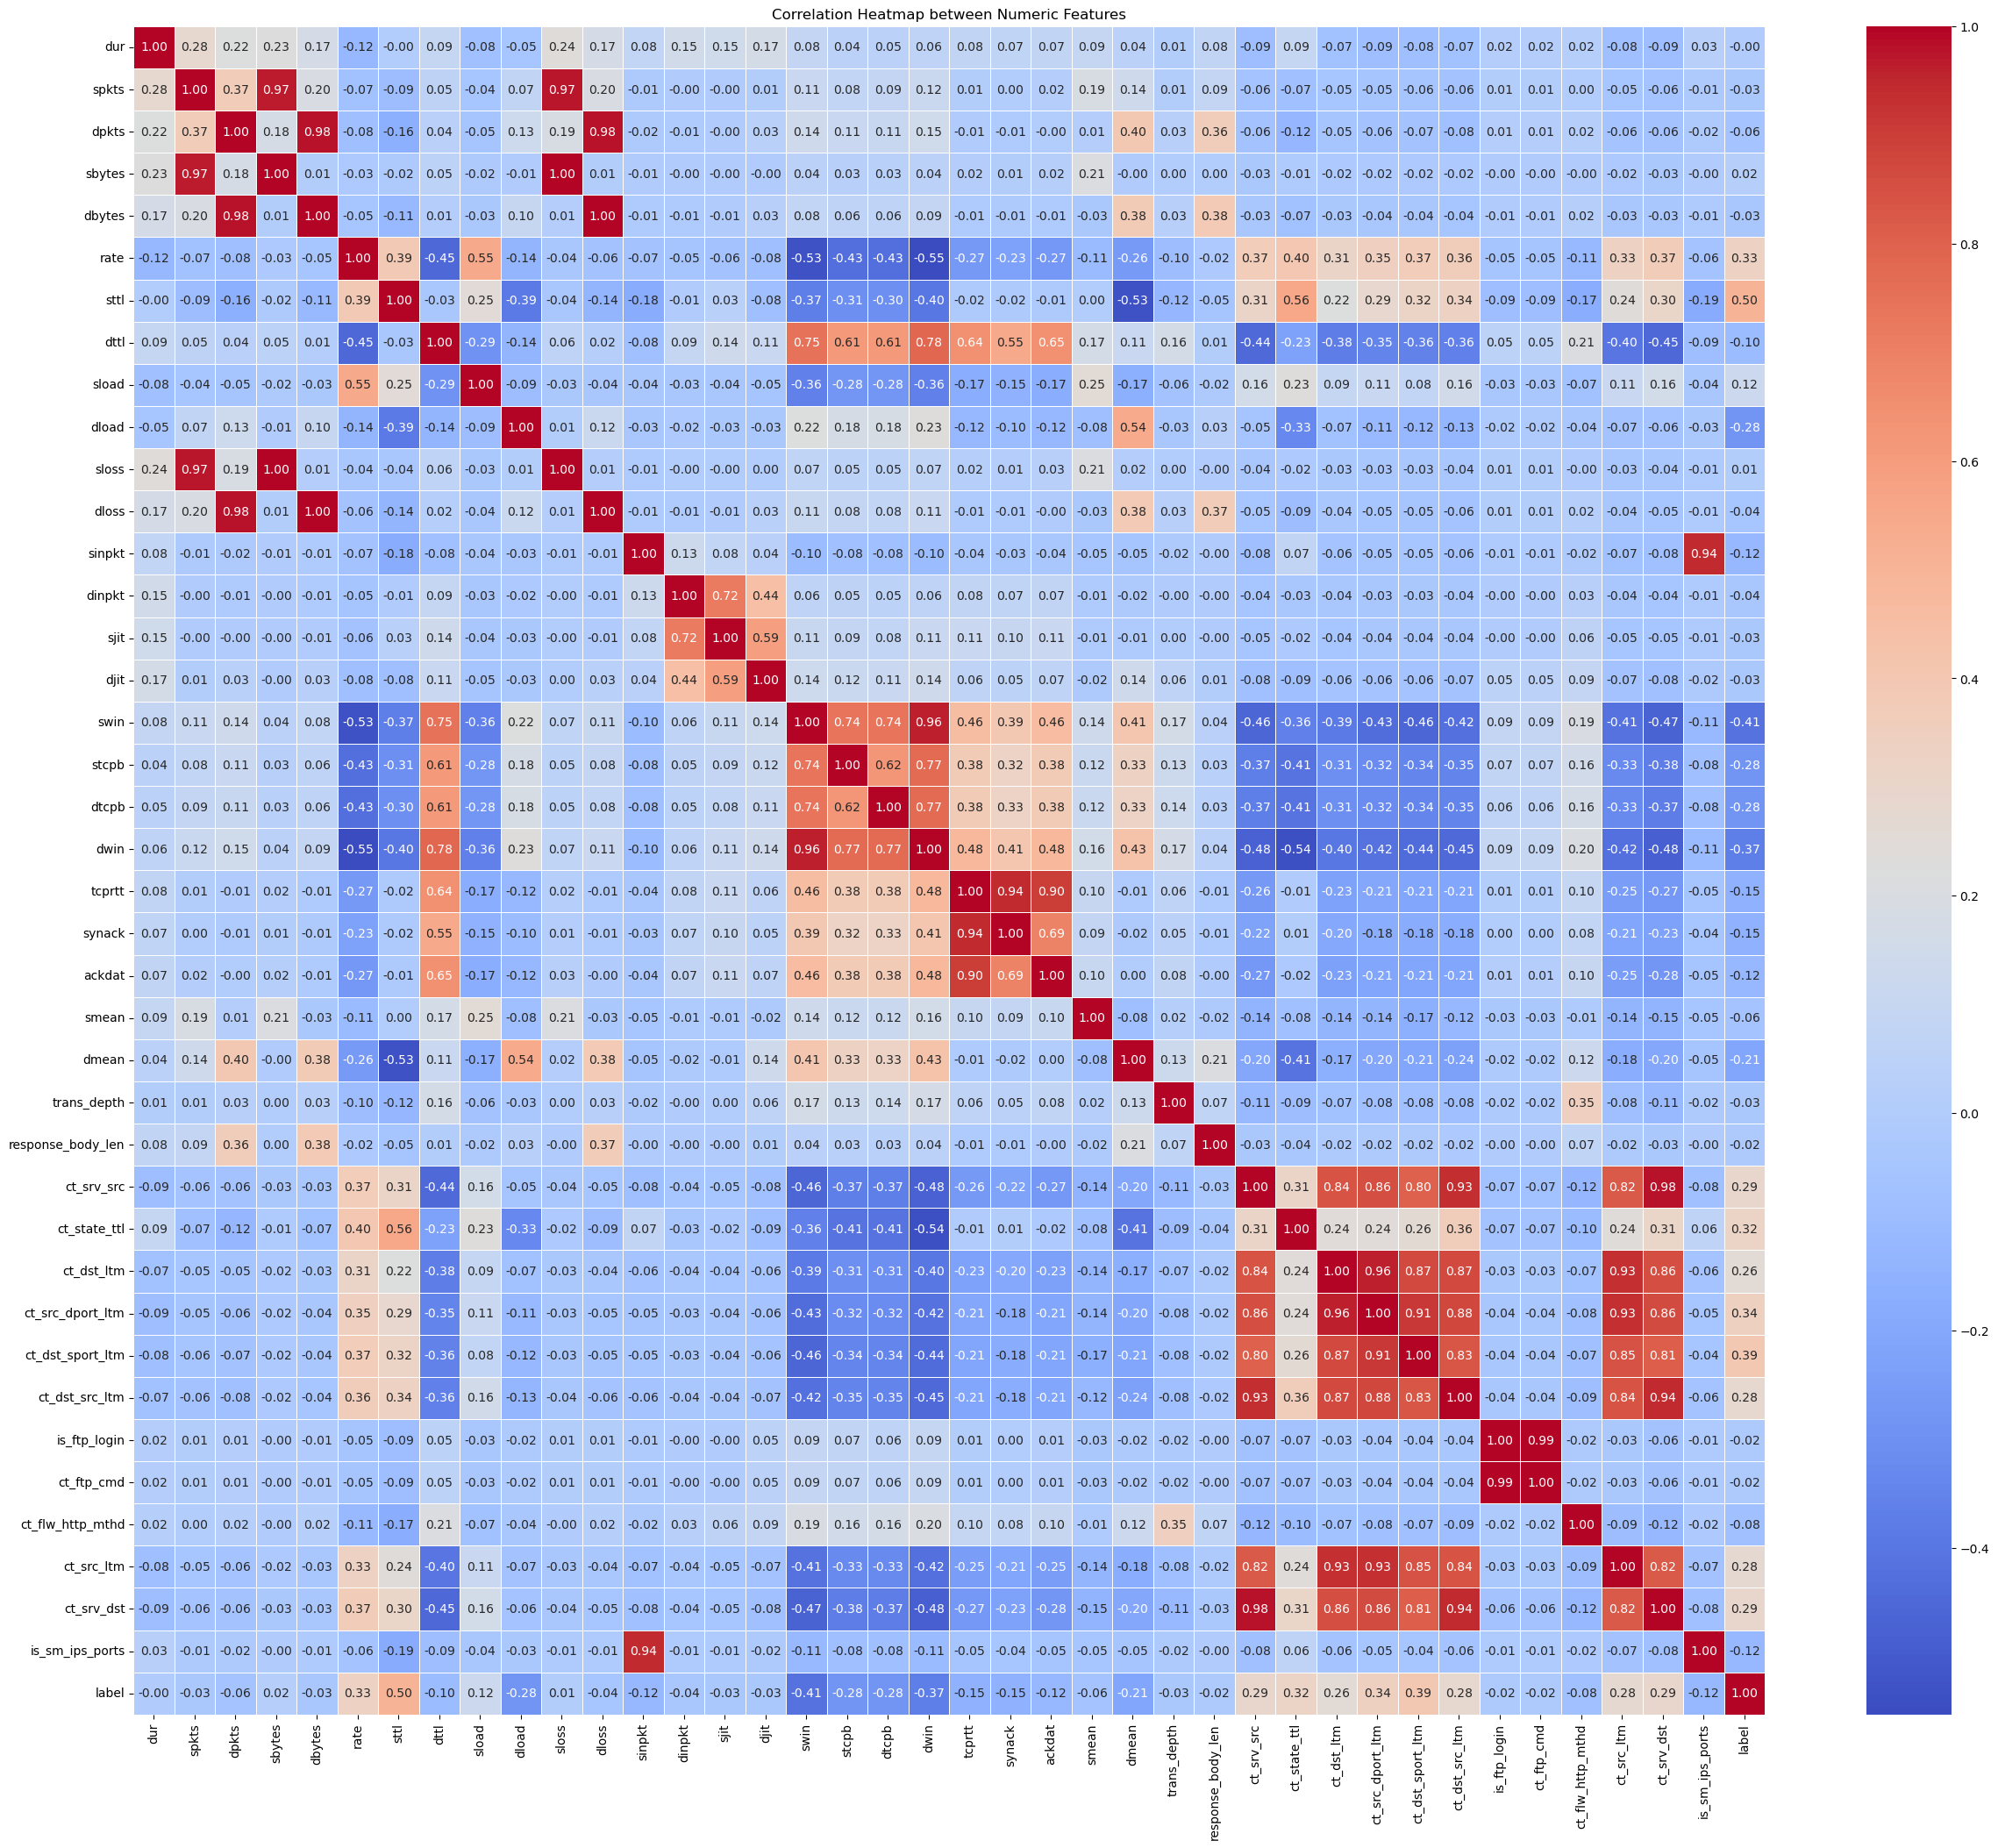

In [341]:
numerical_columns = [col for col in df.columns if df[col].dtypes != "object"]
# Calculate the correlation matrix for numerical columns
corr = df[numerical_columns].corr()

plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap between Numeric Features')
plt.show()

In [342]:
# Calculate the correlation matrix
numerical_columns = [col for col in df.columns if df[col].dtypes != "object"]
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 85
high_correlation_mask = correlation_matrix >= 0.8

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))
# Create a DataFrame to display the highly correlated features in a table
correlation_table = pd.DataFrame(highly_correlated_features, columns=['Feature 1', 'Feature 2'])

# Display the table
print("Highly correlated features in table format:")
print(correlation_table.head(40))


Highly correlated features in table format:
           Feature 1         Feature 2
0              spkts            sbytes
1              spkts             sloss
2              dpkts            dbytes
3              dpkts             dloss
4             sbytes             sloss
5             dbytes             dloss
6             sinpkt   is_sm_ips_ports
7               swin              dwin
8             tcprtt            synack
9             tcprtt            ackdat
10        ct_srv_src        ct_dst_ltm
11        ct_srv_src  ct_src_dport_ltm
12        ct_srv_src  ct_dst_sport_ltm
13        ct_srv_src    ct_dst_src_ltm
14        ct_srv_src        ct_src_ltm
15        ct_srv_src        ct_srv_dst
16        ct_dst_ltm  ct_src_dport_ltm
17        ct_dst_ltm  ct_dst_sport_ltm
18        ct_dst_ltm    ct_dst_src_ltm
19        ct_dst_ltm        ct_src_ltm
20        ct_dst_ltm        ct_srv_dst
21  ct_src_dport_ltm  ct_dst_sport_ltm
22  ct_src_dport_ltm    ct_dst_src_ltm
23  ct_src_dport_ltm

In [344]:
for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # Drop feature2 (you can also choose to drop feature1 instead)


#features_to_drop = ['ct_src_dport_ltm', 'ct_ftp_cmd', 'sbytes', 'ct_src_ltm', 'is_sm_ips_ports', 'ct_dst_src_ltm', 'dbytes', 'ackdat', 'ct_dst_ltm', 'synack', 'dloss', 'dwin', 'sloss', 'ct_dst_sport_ltm', 'ct_srv_dst']
#df = df.drop(features_to_drop, axis=1)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(df.columns)

Remaining features after dropping highly correlated ones:
Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [347]:
df_encoded = pd.get_dummies(df)
X = df_encoded.iloc[:, :-1]
y = df_encoded['label']


In [349]:
# Random Forest
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
conf_matrix_sum = np.zeros((2, 2))

for i in range(5):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Initialize and train the RandomForestClassifier
    rf = RandomForestClassifier(random_state=1)
    rf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Accumulate metrics
    accuracy_list.append(accuracy)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_score_list.append(report['weighted avg']['f1-score'])
    conf_matrix_sum += conf_matrix



Random Forest classifier:
Average Accuracy: 1.0000
Average Precision: 1.0000
Average Recall: 1.0000
Average F1-Score: 1.0000


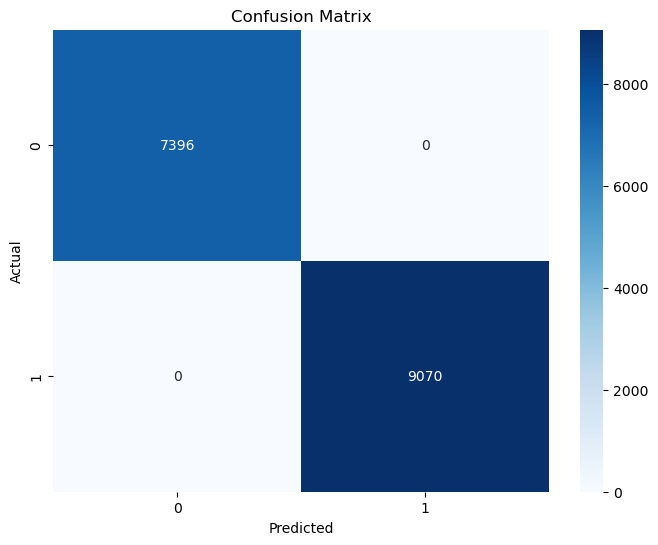

In [351]:
# Calculate average metrics
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1_score = np.mean(f1_score_list)
avg_conf_matrix = conf_matrix_sum / 5

# Print average metrics
print('Random Forest classifier:')
print(f'Average Accuracy: {avg_accuracy:.4f}')
print(f'Average Precision: {avg_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f}')
print(f'Average F1-Score: {avg_f1_score:.4f}')

# Plot average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_conf_matrix.astype(int), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [353]:
# Naive Bayes
accuracy_list_nb = []
precision_list_nb = []
recall_list_nb = []
f1_score_list_nb = []
conf_matrix_sum_nb = np.zeros((2, 2))

for i in range(5):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Initialize and train the Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred_nb = gnb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_nb)
    report = classification_report(y_test, y_pred_nb, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred_nb)
    
    # Accumulate metrics
    accuracy_list_nb.append(accuracy)
    precision_list_nb.append(report['weighted avg']['precision'])
    recall_list_nb.append(report['weighted avg']['recall'])
    f1_score_list_nb.append(report['weighted avg']['f1-score'])
    conf_matrix_sum_nb += conf_matrix

Naive Bayes classifier:
Average Accuracy: 0.7133
Average Precision: 0.7130
Average Recall: 0.7133
Average F1-Score: 0.7104


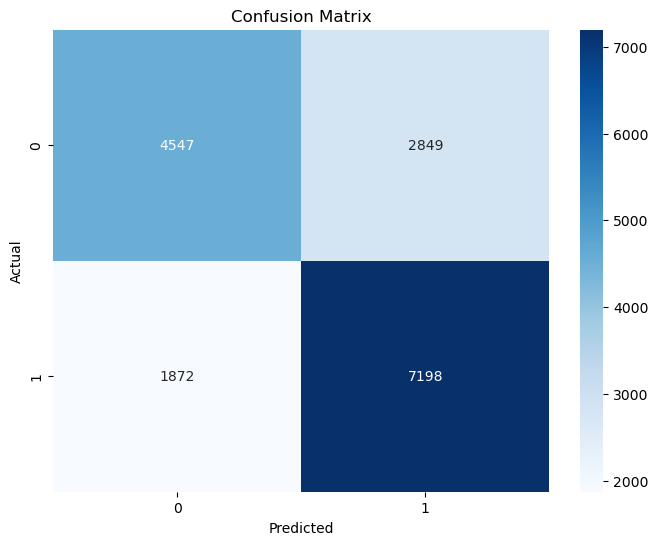

In [355]:
# Calculate average metrics
avg_accuracy_nb = np.mean(accuracy_list_nb)
avg_precision_nb = np.mean(precision_list_nb)
avg_recall_nb = np.mean(recall_list_nb)
avg_f1_score_nb = np.mean(f1_score_list_nb)
avg_conf_matrix_nb = conf_matrix_sum_nb / 5

# Print average metrics
print('Naive Bayes classifier:')
print(f'Average Accuracy: {avg_accuracy_nb:.4f}')
print(f'Average Precision: {avg_precision_nb:.4f}')
print(f'Average Recall: {avg_recall_nb:.4f}')
print(f'Average F1-Score: {avg_f1_score_nb:.4f}')

# Plot average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_conf_matrix_nb.astype(int), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [357]:
# kNN
accuracy_list_knn = []
precision_list_knn = []
recall_list_knn = []
f1_score_list_knn = []
conf_matrix_sum_knn = np.zeros((2, 2))

for i in range(5):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Initialize and train the Naive Bayes model
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred_knn = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    report = classification_report(y_test, y_pred_knn, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred_knn)
    
    # Accumulate metrics
    accuracy_list_knn.append(accuracy)
    precision_list_knn.append(report['weighted avg']['precision'])
    recall_list_knn.append(report['weighted avg']['recall'])
    f1_score_list_knn.append(report['weighted avg']['f1-score'])
    conf_matrix_sum_knn += conf_matrix

kNN classifier:
Average Accuracy: 0.8147
Average Precision: 0.8152
Average Recall: 0.8147
Average F1-Score: 0.8149


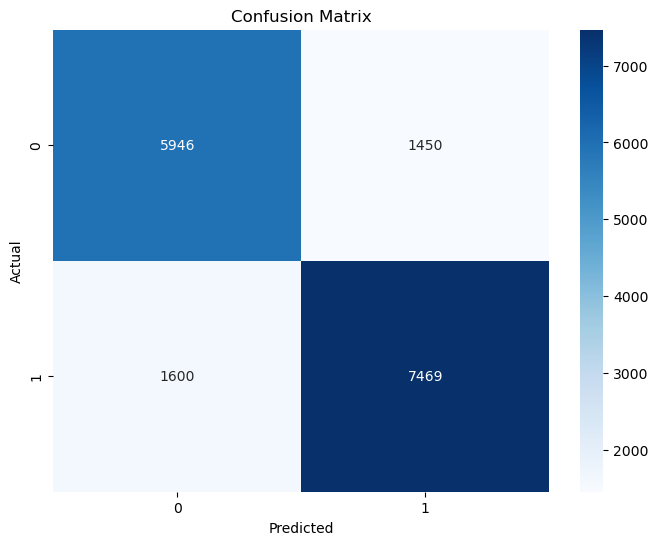

In [359]:
# Calculate average metrics
avg_accuracy_knn = np.mean(accuracy_list_knn)
avg_precision_knn = np.mean(precision_list_knn)
avg_recall_knn = np.mean(recall_list_knn)
avg_f1_score_knn = np.mean(f1_score_list_knn)
avg_conf_matrix_knn = conf_matrix_sum_knn / 5

# Print average metrics
print('kNN classifier:')
print(f'Average Accuracy: {avg_accuracy_knn:.4f}')
print(f'Average Precision: {avg_precision_knn:.4f}')
print(f'Average Recall: {avg_recall_knn:.4f}')
print(f'Average F1-Score: {avg_f1_score_knn:.4f}')

# Plot average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_conf_matrix_knn.astype(int), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()